# Projeto de Ciência de Dados
## João Victor Siqueira Tenório Silva

## 1. Definição do Problema

O dataset usado neste projeto será os dados de consumo e kilometragem rodadas, proveniente do TicketLpog da empresa ESSE engenharia. Seu objetivo é prever o consumo em km/l de um equipamento, com base em certas medidas como peso e ano de fabricação. Este dataset é um subconjunto do dataset original e aqui, foram considerados os automóveis médios e pesados, desconsiderando motocicletas e equipamentos periféricos como compressores e geradores. A variável peso desconsidera o peso das cargas de cada veículo, por falta de informações.



**Informações sobre os atributos:**
1. **Peso** - Peso do veículo (kg)
2. **Ano** - Ano do modelo do automóvel
3. **Combustível** - Tipo de combustível utilizado (Gasolina/Diesel)
4. **Km** - Kilometragem rodada (Km)
5. **Consumo** - Consumo médio do veículo (Km/l)


#1.1 Importando bibliotecas necessárias

Aqui, importamos todas as bibliotecas necessárias para análise de dados, visualização e modelagem preditiva.


In [28]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import seaborn as sns
import joblib
import ipywidgets as widgets
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [29]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [30]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jvsiq9603/projeto_data_science/refs/heads/main/DADOS%20CONSUMO%20FINAL.csv%20(1)%20-%20DADOS%20CONSUMO%20FINAL%20-%20Updated_Dataset_without_dots_in_Km_Rodados.csv%20(1).csv.csv"

# Informa o cabeçalho das colunas
colunas = ['Peso', 'Ano', 'Combustível','Km' ,'Consumo']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [31]:
dataset.head()

,Peso,Ano,Combustível,Km,Consumo
0,1131,2023,1,6189,12.43
1,1028,2023,1,6131,13.75
2,1028,2023,1,4863,13.67
3,1058,2023,1,3445,10.91
4,976,2023,1,3958,11.96


## 3. Análise Exploratória dos Dados

Nesta etapa, examinamos as dimensões do dataset e algumas informações básicas sobre os dados.

In [32]:

# Verificando o tamanho e as informações do dataset
print(dataset.shape)
print(dataset.info())

# Verificar se há valores ausentes
print(dataset.isnull().sum())


(306, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Peso         306 non-null    int64  
 1   Ano          306 non-null    int64  
 2   Combustível  306 non-null    int64  
 3   Km           306 non-null    int64  
 4   Consumo      306 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 12.1 KB
None
Peso           0
Ano            0
Combustível    0
Km             0
Consumo        0
dtype: int64


### 3.1 Visualização dos Dados
Realizamos algumas visualizações para entender melhor a distribuição dos dados e possíveis relações entre as variáveis.

É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [33]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

,0
Peso,int64
Ano,int64
Combustível,int64
Km,int64
Consumo,float64


In [34]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Peso,Ano,Combustível,Km,Consumo
count,306.000000,306.000000,306.000000,306.000000,306.000000
mean,8092.303922,2017.970588,1.598039,3436.029412,7.387974
std,8232.818466,6.543357,0.491097,1934.749165,5.082171
min,961.000000,2000.000000,1.000000,316.000000,0.480000
25%,1058.000000,2011.250000,1.000000,2362.250000,4.312500
50%,8000.000000,2021.000000,2.000000,3169.000000,5.510000
75%,10800.000000,2023.000000,2.000000,4316.000000,10.936250
max,29000.000000,2025.000000,2.000000,24640.000000,61.360000


### 3.2. Visualizações Unimodais

Os histogramas são essenciais para entender a frequência e a distribuição de variáveis numéricas. Eles ajudam a identificar padrões de concentração, assimetrias e a presença de outliers. Ao observar as frequências, podemos entender melhor a estrutura dos dados, detectar anomalias e fazer inferências sobre a amostra em questão.


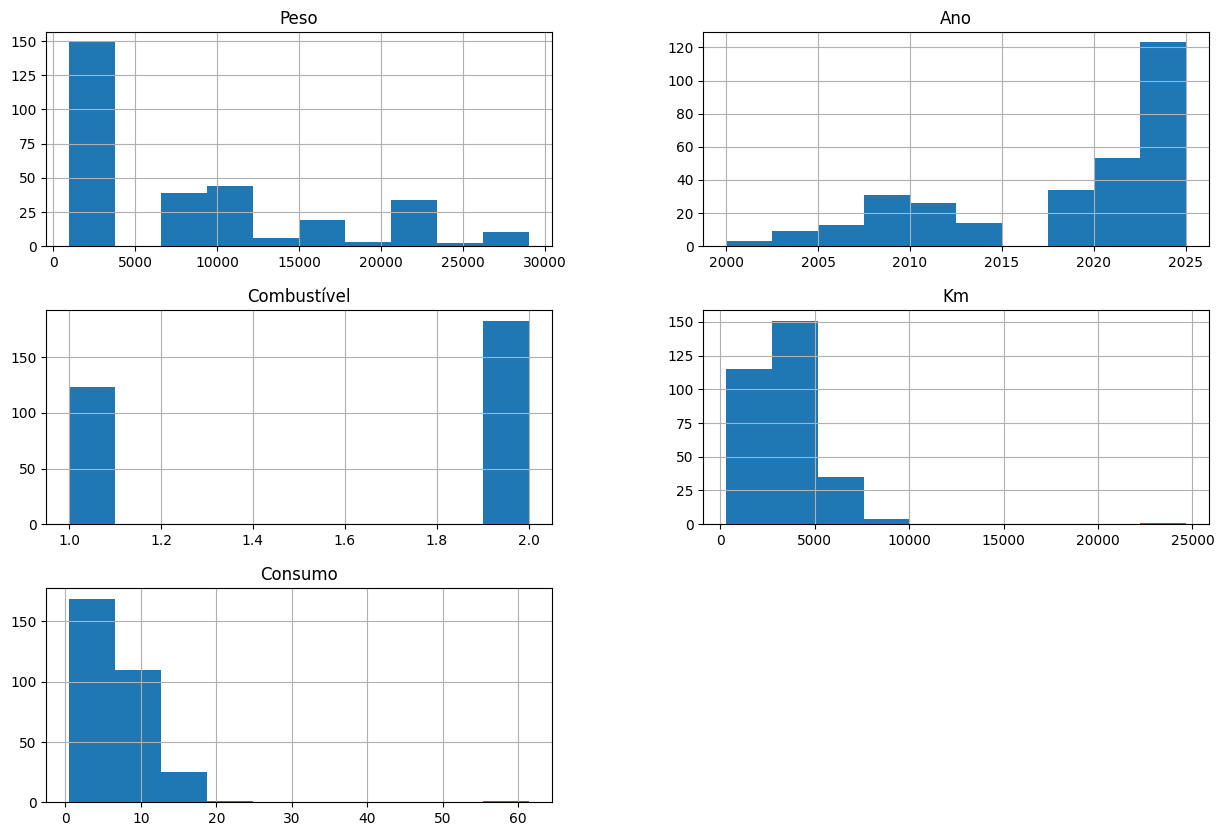

In [35]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

Os histogramas revelam que a maioria dos veículos ou registros está concentrada em pesos abaixo de 5.000 kg e quilometragem até 5.000 km. A distribuição do ano mostra uma predominância de veículos recentes, especialmente entre 2020 e 2025. O combustível apresenta dois grupos principais, indicando dois tipos predominantes. O consumo de combustível está concentrado entre 0 e 20, com alguns outliers em torno de 60. Esses resultados mostram que os dados são majoritariamente compostos por veículos recentes, com baixo peso, baixa quilometragem e consumo moderado.

Os gráficos de densidade ("Density Plots") apresentados mostram a distribuição de diferentes variáveis (Peso, Ano, Combustível, Km, e Consumo). Eles são úteis para identificar padrões nas distribuições dos dados, assim como valores atípicos (outliers) e assimetrias.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

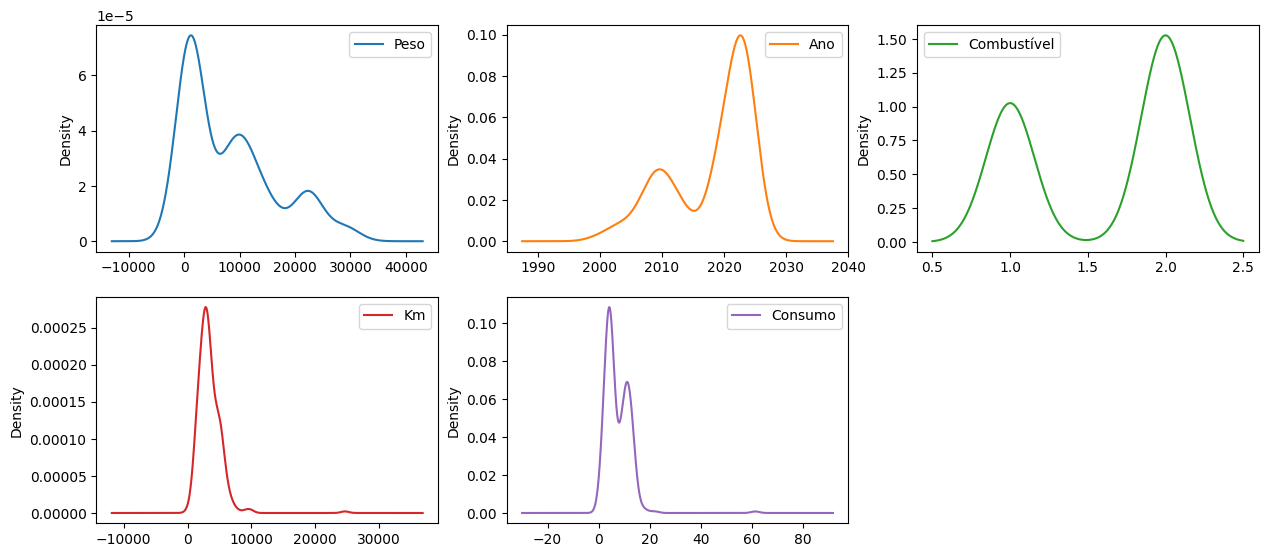

In [36]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Os gráficos de densidade mostram que a maior parte dos dados concentra-se em intervalos específicos, com alguns outliers. O Peso e o Km têm distribuições com picos iniciais significativos e caudas longas, sugerindo alguns valores fora da média. O Ano concentra-se em torno de 2020, indicando a predominância de registros recentes. A variável Combustível apresenta uma distribuição bimodal, sugerindo dois tipos predominantes de combustível, enquanto o Consumo tem a maioria dos dados entre 5 e 15, com algumas variações menores. Esses gráficos revelam padrões claros nas variáveis analisadas.

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*


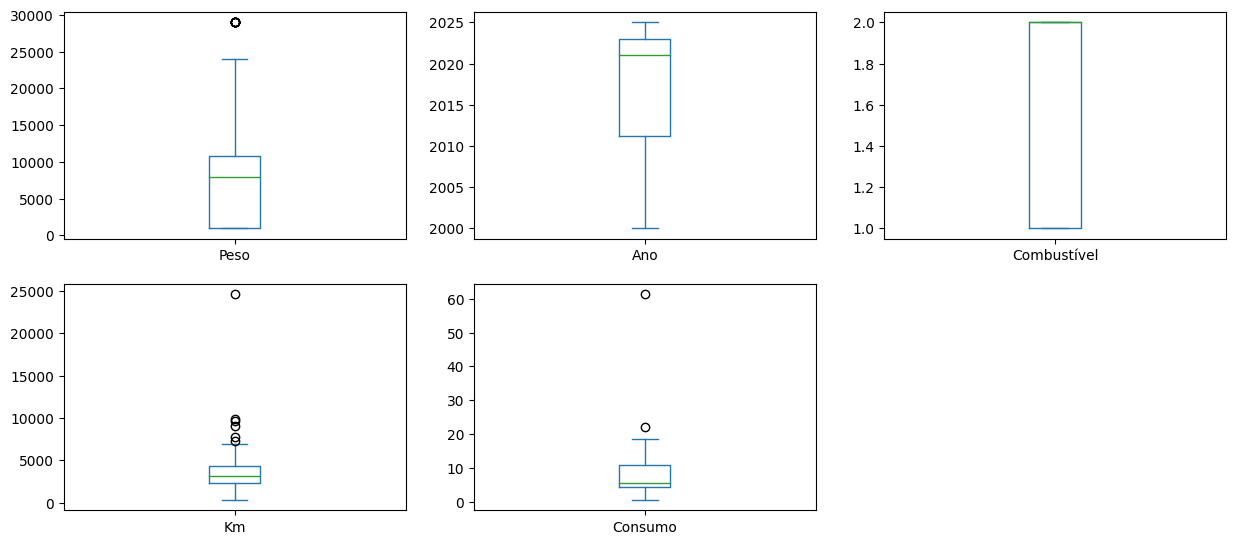

In [37]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Os boxplots mostram que as variáveis Peso, Km e Consumo possuem outliers, indicando valores extremos que destoam da maioria dos dados, enquanto a variável Ano possui uma distribuição mais uniforme e sem outliers. Já a variável Combustível parece ter uma variação limitada, pois é categorizada em apenas dois valores. A mediana de cada variável está dentro dos intervalos esperados, mas as discrepâncias em Peso, Km e Consumo sugerem a necessidade de uma análise mais detalhada para entender esses pontos fora do padrão.

### 3.3. Visualizações Multimodais

A matriz de correlação apresentada mostra como as variáveis do conjunto de dados se relacionam entre si, com valores variando de -1 a 1. As células em tons de azul mais escuro indicam correlações positivas fortes, como entre Peso e Combustível (0,7), enquanto as células em vermelho mais intenso sugerem correlações negativas, como entre Combustível e Consumo (-0,72). Isso implica que conforme o consumo aumenta, o combustível e o peso tendem a diminuir. As variáveis Ano e Consumo também possuem uma correlação moderadamente positiva (0,46), sugerindo que veículos mais novos têm maior consumo. Analisar essas relações é fundamental, pois variáveis altamente correlacionadas podem impactar o desempenho de alguns algoritmos de aprendizado de máquina, como a regressão linear, exigindo técnicas como a remoção de atributos redundantes ou regularização para evitar colinearidade.

O código abaixo apresenta a matriz de correlação.


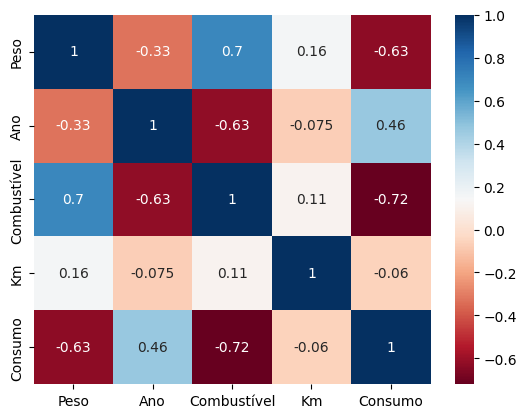

In [38]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

## 4. Preparação dos dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

O tratamento dos dados foi feito de forma manual, no arquivo nativo da ticketlog, de forma que não há nenhum valor vazio e eliminação dos dados desnecessários.

In [39]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
Peso,0
Ano,0
Combustível,0
Km,0
Consumo,0


### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática reservar um conjunto de teste, também conhecido como conjunto de validação, que consiste em uma amostra dos dados não utilizada na construção do modelo, mas aplicada apenas ao final para avaliar sua precisão. Esse procedimento permite verificar o quão bem o modelo foi construído e fornece uma estimativa de seu desempenho em dados novos. Neste caso, utilizaremos 80% dos dados para a modelagem e reservaremos 20% para teste, empregando a estratégia train_test_split mencionada anteriormente.



Aqui, separamos as variáveis independentes (features) e a variável dependente (alvo) para o modelo preditivo.

In [40]:
# Selecionando as features e a variável alvo
X = dataset[['Peso', 'Ano', 'Combustível','Km']]
y = dataset['Consumo']


Dividimos o dataset em conjuntos de treino e teste, onde 20% dos dados serão usados para teste.

In [41]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Construindo o Pipeline

### 5.1 Criando o Pipeline de Pré-processamento

Aqui, definimos quais características são numéricas e configuramos um transformador para escalonar essas características.

In [42]:
numeric_features = ['Peso', 'Ano', 'Km', 'Combustível']
categorical_features = []  # Nenhuma

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

##5.2 Definição dos modelos e seus respectivos grids de hiperparâmetros
Aqui, definimos vários modelos de regressão que serão testados, juntamente com os parâmetros que serão ajustados.

In [43]:
# Definição dos modelos e seus respectivos grids de hiperparâmetros
modelos = {
    'Linear Regression': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ]),
        'param_grid': {}
    },
    'Ridge Regression': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', Ridge())
        ]),
        'param_grid': {
            'regressor__alpha': [0.1, 1.0, 10.0, 100.0],
            'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr']
        }
    },
    'Lasso Regression': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', Lasso())
        ]),
        'param_grid': {
            'regressor__alpha': [0.01, 0.1, 1.0, 10.0],
            'regressor__max_iter': [1000, 5000, 10000]
        }
    },
    'Elastic Net': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', ElasticNet())
        ]),
        'param_grid': {
            'regressor__alpha': [0.1, 1.0, 10.0],
            'regressor__l1_ratio': [0.2, 0.5, 0.8],
            'regressor__max_iter': [1000, 5000, 10000]
        }
    },
    'Random Forest': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(random_state=42))
        ]),
        'param_grid': {
            'regressor__n_estimators': [100, 200, 300],
            'regressor__max_depth': [None, 10, 20, 30],
            'regressor__min_samples_split': [2, 5, 10],
        }
    },
    'Gradient Boosting': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', GradientBoostingRegressor(random_state=42))
        ]),
        'param_grid': {
            'regressor__n_estimators': [100, 200, 300],
            'regressor__learning_rate': [0.01, 0.1, 0.2],
            'regressor__max_depth': [3, 5, 7],
            'regressor__min_samples_split': [2, 5, 10],
        }
    },
    'Support Vector Regressor': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', SVR())
        ]),
        'param_grid': {
            'regressor__C': [0.1, 1, 10, 100],
            'regressor__gamma': ['scale', 'auto'],
            'regressor__kernel': ['linear', 'rbf', 'poly']
        }
    },
    'K-Nearest Neighbors': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', KNeighborsRegressor())
        ]),
        'param_grid': {
            'regressor__n_neighbors': [3, 5, 7, 9],
            'regressor__weights': ['uniform', 'distance'],
            'regressor__p': [1, 2]
        }
    },
    'Decision Tree': {
        'pipeline': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', DecisionTreeRegressor(random_state=42))
        ]),
        'param_grid': {
            'regressor__max_depth': [None, 10, 20, 30],
            'regressor__min_samples_split': [2, 5, 10],
            'regressor__min_samples_leaf': [1, 2, 4]
        }
    }
}

##5.3-Treinamento e otimização dos modelos

Aqui, realizamos o treinamento e a otimização de cada modelo usando GridSearchCV, e calculamos as métricas de desempenho.

In [44]:
# Armazenar os melhores resultados
melhores_resultados = []

# Loop através de cada modelo para realizar GridSearchCV
for nome, modelo_info in modelos.items():
    print(f"\nTreinando e otimizando o modelo: {nome}")
    pipeline = modelo_info['pipeline']
    param_grid = modelo_info['param_grid']

    # Definir GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=0
    )

    # Treinar com GridSearchCV
    grid_search.fit(X_train, y_train)

    # Previsões no conjunto de teste
    y_pred = grid_search.predict(X_test)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Armazenar resultados
    melhores_resultados.append({
        'Modelo': nome,
        'Melhores Parâmetros': grid_search.best_params_,
        'R2': r2,
        'MSE': mse,
        'MAE': mae
    })



Treinando e otimizando o modelo: Linear Regression

Treinando e otimizando o modelo: Ridge Regression

Treinando e otimizando o modelo: Lasso Regression

Treinando e otimizando o modelo: Elastic Net

Treinando e otimizando o modelo: Random Forest

Treinando e otimizando o modelo: Gradient Boosting

Treinando e otimizando o modelo: Support Vector Regressor

Treinando e otimizando o modelo: K-Nearest Neighbors

Treinando e otimizando o modelo: Decision Tree


##5.4- Apresentação dos resultados
Aqui, organizamos os resultados dos modelos em um DataFrame para fácil visualização e apresentação.

In [45]:
# Converter resultados em DataFrame
resultados_df = pd.DataFrame(melhores_resultados)

# Ordenar por R2
resultados_df = resultados_df.sort_values(by='R2', ascending=False)

# Mostrar os resultados
display(resultados_df)

,Modelo,Melhores Parâmetros,R2,MSE,MAE
4,Random Forest,"{'regressor__max_depth': None, 'regressor__min...",0.856443,2.229770,0.950163
5,Gradient Boosting,"{'regressor__learning_rate': 0.01, 'regressor_...",0.855695,2.241391,1.049727
6,Support Vector Regressor,"{'regressor__C': 10, 'regressor__gamma': 'scal...",0.841397,2.463469,1.066464
2,Lasso Regression,"{'regressor__alpha': 0.1, 'regressor__max_iter...",0.834808,2.565805,1.134826
0,Linear Regression,{},0.831303,2.620253,1.143684
1,Ridge Regression,"{'regressor__alpha': 10.0, 'regressor__solver'...",0.830647,2.630441,1.157303
3,Elastic Net,"{'regressor__alpha': 0.1, 'regressor__l1_ratio...",0.829922,2.641690,1.162031
8,Decision Tree,"{'regressor__max_depth': 10, 'regressor__min_s...",0.653955,5.374855,1.190602
7,K-Nearest Neighbors,"{'regressor__n_neighbors': 9, 'regressor__p': ...",0.643579,5.536017,1.472554


##5.5- Visualização dos resultados


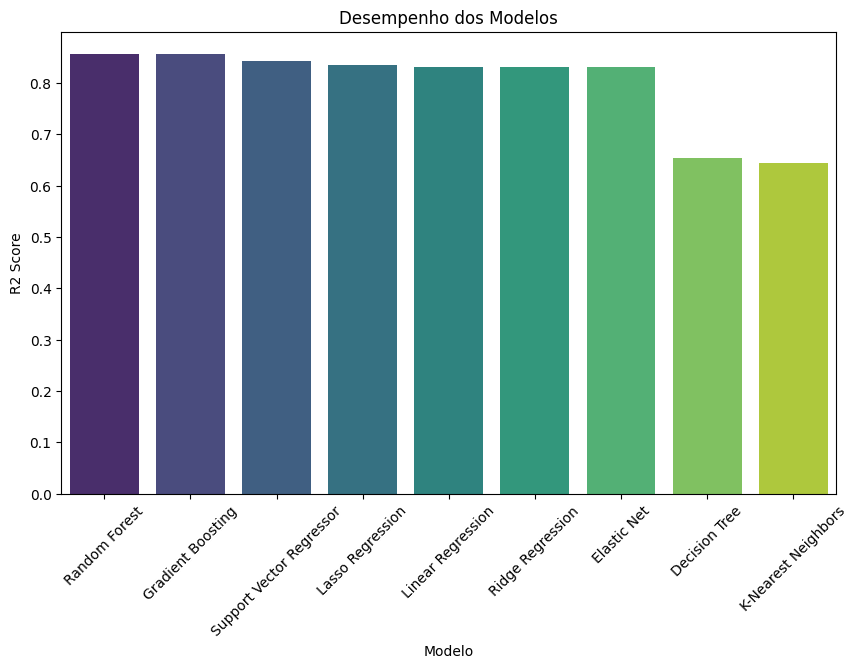

In [46]:
# Visualizar o desempenho dos modelos
plt.figure(figsize=(10, 6))
sns.barplot(data=resultados_df, x='Modelo', y='R2', palette='viridis')
plt.title('Desempenho dos Modelos')
plt.xticks(rotation=45)
plt.ylabel('R2 Score')
plt.show()

Os resultados mostram que os modelos baseados em árvores, como Random Forest e Gradient Boosting, apresentaram o melhor desempenho com um R² Score próximo de 0,85, indicando maior capacidade de explicação da variação dos dados. Já os modelos lineares e regressões como Lasso, Ridge e Elastic Net obtiveram desempenho intermediário, com R² acima de 0,8, enquanto Decision Tree e K-Nearest Neighbors tiveram os piores resultados, com R² abaixo de 0,75, sugerindo que são menos adequados para o problema analisado.

Se a prioridade é velocidade, o Random Forest tende a ser a escolha preferida, principalmente em conjuntos de dados grandes ou para previsões rápidas. No entanto, o Gradient Boosting frequentemente supera o Random Forest em termos de precisão, embora a um custo maior de tempo e recursos computacionais.


##5.6-Salvar o melhor modelo

Aqui, salvamos o melhor modelo de acordo com o R2 score em um arquivo para uso futuro.

In [47]:
# Salvar o melhor modelo
melhor_modelo = resultados_df.iloc[0]['Modelo']
melhor_pipeline = modelos[melhor_modelo]['pipeline'].set_params(**resultados_df.iloc[0]['Melhores Parâmetros'])
melhor_pipeline.fit(X_train, y_train)

# Salvar o modelo
joblib.dump(melhor_pipeline, 'melhor_modelo.pkl')


['melhor_modelo.pkl']

In [50]:
  # Definir o modelo escolhido (exemplo com Random Forest)
melhor_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])

# Treinar o pipeline com os dados de treino
melhor_pipeline.fit(X_train, y_train)

# Widgets para entrada de dados
peso_widget = widgets.FloatSlider(value=1200, min=500, max=3000, step=50, description='Peso (kg):')
ano_widget = widgets.IntSlider(value=2020, min=1990, max=2024, step=1, description='Ano:')
combustivel_widget = widgets.Dropdown(options=[1, 2], value=1, description='Combustível:')
km_widget = widgets.FloatSlider(value=15000, min=0, max=300000, step=1000, description='Km Rodados:')

# Função de previsão
def fazer_previsao(peso, ano, combustivel, km):
    # Criar um DataFrame com as colunas corretas
    dados = pd.DataFrame([[peso, ano, combustivel, km]], columns=['Peso', 'Ano', 'Combustível', 'Km'])
    consumo_previsto = melhor_pipeline.predict(dados)
    print(f"Consumo previsto: {consumo_previsto[0]:.2f} km/l")

# Botão para previsão
botao_previsao = widgets.Button(description='Prever Consumo')
botao_previsao.on_click(lambda b: fazer_previsao(peso_widget.value, ano_widget.value, combustivel_widget.value, km_widget.value))

# Exibir widgets
display(peso_widget, ano_widget, combustivel_widget, km_widget, botao_previsao)

FloatSlider(value=1200.0, description='Peso (kg):', max=3000.0, min=500.0, step=50.0)

IntSlider(value=2020, description='Ano:', max=2024, min=1990)

Dropdown(description='Combustível:', options=(1, 2), value=1)

FloatSlider(value=15000.0, description='Km Rodados:', max=300000.0, step=1000.0)

Button(description='Prever Consumo', style=ButtonStyle())

Consumo previsto: 13.37 km/l
Consumo previsto: 13.39 km/l
Consumo previsto: 11.50 km/l
Consumo previsto: 11.50 km/l
Consumo previsto: 4.36 km/l
